<a href="https://colab.research.google.com/github/LorenaMendesB/Resumo-Expandido-Aprendizagem-de-M-quina/blob/main/Grupo_1_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <p align = center>  **Aprendizagem de Máquina - Inteligência Artificial** <p  align = left>  
## <p align = center>  **MACHINE LEARNING APLICADA NA ANÁLISE DE POSSÍVEIS CASOS DE ATAQUE CARDÍACO** <p  align = left>  

<p align = center>  Alunos </p>

---

 <p> <b>Nome:</b> Gustavo da Silva Dias. </p>
<p> <b>Nome:</b> João Paulo da Silva Barros. </p>
<p> <b>Nome:</b> Lorena Mendes Barbosa. </p>
<p> <b>Nome:</b> Osvaldo Bispo de Andrade Neto. </p>


# **Naive Bayes**
> Nayve Bayes, ou Bayes Ingênuo, é um classificador probabilístico baseado no Teorema de Bayes. Esse classificador é chamado de ingênuo devido a desconsiderar a dependência entre características das amostras. O Bayes Ingênuo está entre os mais simples modelos de redes bayesianas.

> Esse notebook foi escrito por Alison Zille Lopes, entretanto grande parte foi baseada em {1}, logo, emprega a biblioteca de aprendizagem de máquina scikit learn {2}.
---
{1} Vanderplas, J. In Depth: Naive Bayes Classification. Disponível em: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb#scrollTo=c8Br2IVH9je0. Acesso em: 2 jan 2021.

{2} SCIKIT-LEARN. scikit-learn: Machine Learning in Python. Disponível em: https://scikit-learn.org/stable/index.html. Acesso em: 2 jan 2021.

# **Base de Dados**
>Entrada da base de dados por intermédio da seleção de um arquivo csv. A abertura é realizada através de uma janela externa, a qual gera uma tabela com os dados. A primeira linha da tabela, geralmente, será composta pelos rótulos das colunas.

>* O teste do presente notebook foi realizado através da base de dados sobre espécies de flores do gênero Iris {3}. A base de dados contém 150 amostras, sendo cada uma formada por 5 atributos (4 características e 1 classe).
---
{3} Fisher, R. A. Iris Species Dataset. 1936. Disponível em: https://www.kaggle.com/uciml/iris. Acesso em: 4 jan 2021.

In [ ]:
# [1] Entrada da Base de Dados
from google.colab import files
import pandas as pd
import io
uploaded = files.upload() # uploaded é um dicionário, sendo a chave o nome do arquivo

#list(uploaded.keys())[0] foi a forma que encontrei de não entrar com o nome do arquivo no código
table = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

Saving heart.csv to heart (1).csv


# **Preparação dos Conjuntos**
>Os trechos de código a seguir servem para separar os conjuntos de treinamento e teste, devendo ser selecionada um das versões.
* [2.1] separa, aleatoriamente, 75 % dos dados para treinamento (train) e 25 % para teste (test).
* [2.2] irá, para cada classe, colocar 75 % dos dados no treinamento (train) e os 25 % restantes no conjunto de teste (test)

In [ ]:
#[2.1] Formação dos conjuntos de treinamento e teste
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = np.array(table) 

#data = data[:, 1:]  remover essa linha caso a primeira coluna corresponda a dados relevantes

# Indentificando os rótulos das classes
labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

y = np.array(data[:, data.shape[1]-1])
x = (data[:, :(data.shape[1]-1)]).astype(np.float32)

# Gerando os conjuntos de treinamento e teste (validação)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25) # 0.25 dos dados no conjunto de teste

print('Conjuntos de treinamento e teste separados!')

Conjuntos de treinamento e teste separados!


In [ ]:
#[2.2] Formação dos conjuntos de treinamento e teste
import pandas as pd
import numpy as np

data = np.array(table)

#data = data[:, 1:]  remover essa linha caso a primeira coluna corresponda a dados relevantes

# Indentificando os rótulos das classes
labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

# Contando o número de dados (amostras) em cada classe
num_labels = [] # lista com número de amostras por classe
ctrl = [] # lista usada na separação entre treinamento e teste
for label in labels:
  count = 0
  for line in range(data.shape[0]):
    if(label == data[line, data.shape[1]-1]):
      count = count + 1
  num_labels.append(count)
  ctrl.append(0)

# num_labels passa a conter o número de elementos por classe no conjunto de treinamento
train_p = 0.75 # percentual dos dados na lista de treinamento
for i in range(len(num_labels)):
  num_labels[i] = round(num_labels[i] * train_p)

train = int(0) # atribuir 0 seria suficiente, mas resolvi garantir
test = int(0)

# separação dos conjuntos de treinamento (train) e teste (test)
for line in range(data.shape[0]):
  for label in labels:
    if(label == data[line, data.shape[1]-1]):      
      aux = labels.index(label) 
      
      if (ctrl[aux] < num_labels[aux]):
        if (type(train) is int):
          train = data[line, :]
        else:
          train = np.row_stack((train, data[line, :]))      
      else:
        if (type(test) is int):
          test = data[line, :]
        else:
          test = np.row_stack((test, data[line, :]))
      ctrl[aux] = ctrl[aux]+1
      break

train_x = (train[:, :train.shape[1]-1]).astype(np.float32) # entradas de train
train_y = train[:, train.shape[1]-1]  # saídas (classes) de train
test_x = (test[:, :test.shape[1]-1]).astype(np.float32) # entradas de test
test_y = test[:, test.shape[1]-1] # saídas (classes) de test

print('Conjuntos de treinamento e teste separados!')

Conjuntos de treinamento e teste separados!


# **Naive Bayes:** modelo gerador e treinamento
> Na classificação bayesiana, estamos interessados em encontrar a probabilidade de um rótulo ($R$ - classe) dadas algumas características observadas, que podemos escrever como $P(R~|~{\rm características})$. O teorema de Bayes nos diz como expressar isso em termos de quantidades que podemos calcular mais diretamente:

$$
P(R~|~{\rm característica}) = \frac{P({\rm características}~|~R)P(R)}{P({\rm características})}
$$

> Assim, é preciso um modelo pelo qual possamos calcular $P({\rm características}~|~R_i)$ para cada rótulo. Esse modelo é chamado de *modelo gerador* porque especifica o processo que gera os dados.
Especificar esse modelo gerador para cada rótulo é a parte principal do treinamento do Naive Bayes.

> O modelo gerador mais fácil de entender é o gaussiano, no qual os dados de cada rótulo seguem uma distribuição gaussiana.
* O modelo gerador no código abaixo é gaussiano.




In [ ]:
# [3] Ajuste do modelo para classes com distribuição gaussiana
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(train_x, train_y)
print('Modelo Ajustado!')

Modelo Ajustado!


# **Análise:** Conjunto de Treinamento
O código a seguir serve para exibir uma matriz de confusão, permitindo visualizar erros de classificação do modelo frente as classes reais.
> A matriz de confusão é gerada para o conjunto de treinamento

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       104
         1.0       0.86      0.91      0.89       124

    accuracy                           0.87       228
   macro avg       0.87      0.87      0.87       228
weighted avg       0.87      0.87      0.87       228

A acurácia é  0.8728070175438597


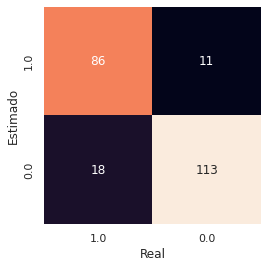

In [ ]:
# [4] Matriz de confusão para o conjunto de treinamento
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

train_est_y = model.predict(train_x)

mat = confusion_matrix(train_y, train_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(train_y, train_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(train_est_y, train_y)) # exibe acurácia

# **Análise:** Conjunto de Teste
O código a seguir serve para exibir uma matriz de confusão, permitindo visualizar erros de classificação do modelo frente as classes reais.
> A matriz de confusão é gerada para o conjunto de teste

              precision    recall  f1-score   support

         0.0       0.75      0.62      0.68        34
         1.0       0.72      0.83      0.77        41

    accuracy                           0.73        75
   macro avg       0.74      0.72      0.73        75
weighted avg       0.74      0.73      0.73        75

A acurácia é  0.7333333333333333


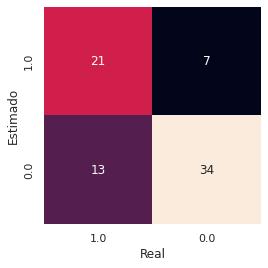

In [ ]:
# [5] Matriz de confusão para o conjunto de teste
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

test_est_y = model.predict(test_x)

mat = confusion_matrix(test_y, test_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(test_y, test_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(test_est_y, test_y)) # exibe acurácia